# This notebook calculates North America APW based on .rot files from global plate reconstructions

In [1]:
import pmagpy.ipmag as ipmag
import numpy as np
import matplotlib.pyplot as plt
from pole_rotation import*
import pygplates
%config InlineBackend.figure_format = 'retina'

In [2]:
fixed_plate = 1 # fix spin axis
NAM = 101 # plate number for North America

resolution = 200 # resolution of the APW to calculate
max_age = 130. # max age in Ma, min age is 0 Ma

## Get APW from Muller et al., 2016

- Müller, R. D., Seton, M., Zahirovic, S., Williams, S. E., Matthews, K. J., Wright, N. M., ... & Cannon, J. (2016). Ocean basin evolution and global-scale plate reorganization events since Pangea breakup. Annual Review of Earth and Planetary Sciences, 44, 107-138. DOI:10.1146/annurev-earth-060115-012211


(63.005775726795356, 76.96627221098969, 40.37505064996724)


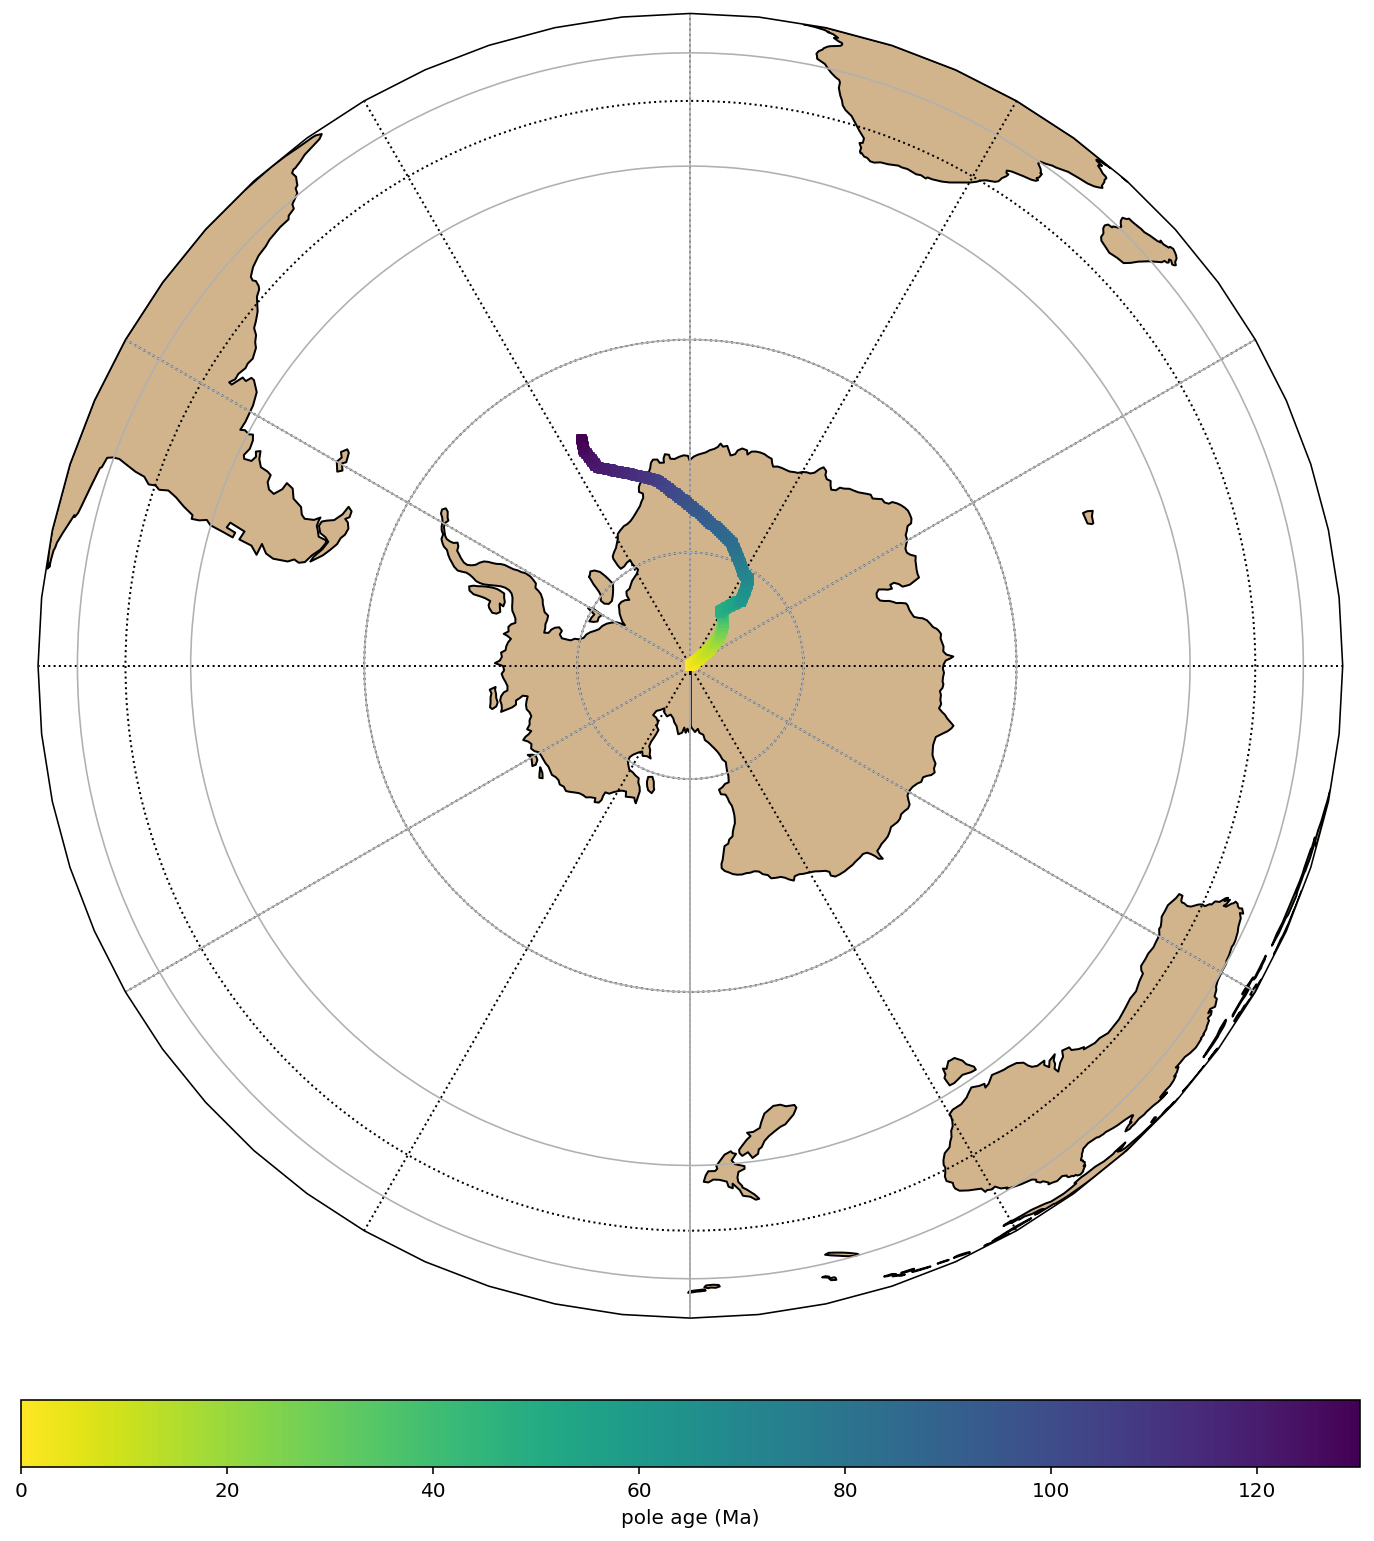

In [3]:
Muller2016_rotation_file = '../data/Muller2016a_Global_EarthByte_230-0Ma_GK07_AREPS.rot'
Muller2016_rotation_model = pygplates.RotationModel(Muller2016_rotation_file)

times = np.linspace( 0., max_age, resolution)
lats = np.empty_like(times)
lons = np.empty_like(times)
pole = PlateCentroid( 0., -90. )
angles = np.empty_like(times)

Euler_lats = np.empty_like(times)
Euler_lons = np.empty_like(times)

for i,t in enumerate(times):
    start_time = 0. if t==0. else times[i-1]
    rotation = Muller2016_rotation_model.get_rotation( t, NAM, start_time, fixed_plate)
    lat, lon, angle = rotation.get_lat_lon_euler_pole_and_angle_degrees()
    Euler_lats[i] = lat
    Euler_lons[i] = lon
    euler_pole = EulerPole( lon, lat, 1.) # Don't care about the rate here
    pole.rotate( euler_pole, -angle)
    angles[i] = angle*resolution/max_age
    lats[i] = pole.latitude
    lons[i] = pole.longitude

average_rotation = Muller2016_rotation_model.get_rotation(times[-1], NAM, 0.0, fixed_plate)
print(average_rotation.get_lat_lon_euler_pole_and_angle_degrees())

ax = ipmag.make_orthographic_map(0, -90, figsize=(15,15))

ipmag.plot_poles_colorbar(ax,lons,
                          lats,
                          np.zeros(len(lats)),
                          times,
                          0,max_age,colormap='viridis_r',
                          markersize=20,marker='s',edgecolor=None)

ax.set_global()
ax.gridlines()
lon_shift=0.
plt.show()

np.savetxt('code_output/NAM_0_130_muller_2016.txt', np.array([times, lons, lats,angles, Euler_lons, Euler_lats]).T )



## Get APW from Torsvik and Cocks 2017

(-64.14975417270476, -64.31302829307867, -44.761412593930224)


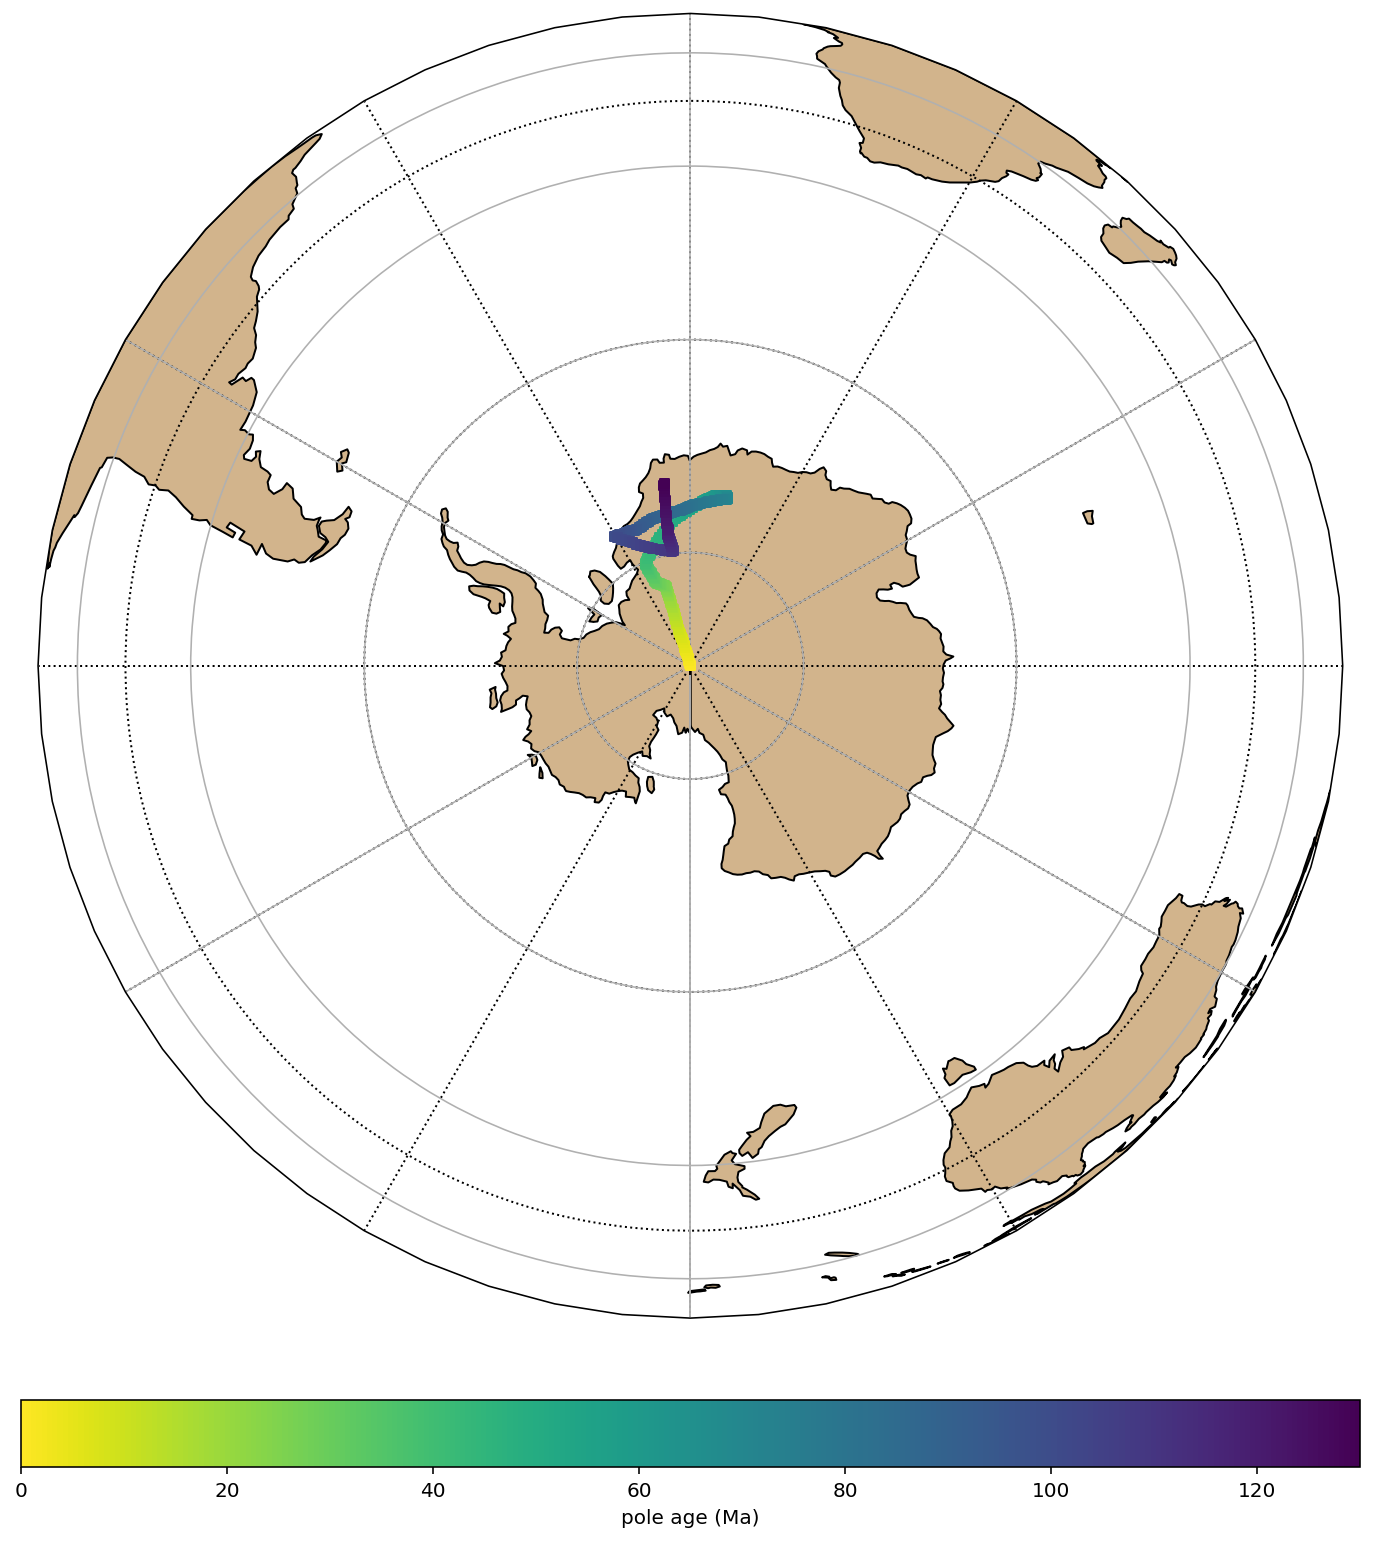

In [4]:
Torsvik2017_rotation_file = '../data/Torsvik_Cocks_HybridRotationFile.rot'
Torsvik2017_rotation_model = pygplates.RotationModel(Torsvik2017_rotation_file)

times = np.linspace( 0., max_age, resolution)
lats = np.empty_like(times)
lons = np.empty_like(times)
pole = PlateCentroid( 0., -90. )
angles = np.empty_like(times)

Euler_lats = np.empty_like(times)
Euler_lons = np.empty_like(times)

for i,t in enumerate(times):
    start_time = 0. if t==0. else times[i-1]
    rotation = Torsvik2017_rotation_model.get_rotation( t, NAM, start_time, fixed_plate)
    lat, lon, angle = rotation.get_lat_lon_euler_pole_and_angle_degrees()
    Euler_lats[i] = lat
    Euler_lons[i] = lon
    euler_pole = EulerPole( lon, lat, 1.) # Don't care about the rate here
    pole.rotate( euler_pole, -angle)
    angles[i] = angle*resolution/max_age
    lats[i] = pole.latitude
    lons[i] = pole.longitude

average_rotation = Torsvik2017_rotation_model.get_rotation(times[-1], NAM, 0.0, fixed_plate)
print(average_rotation.get_lat_lon_euler_pole_and_angle_degrees())

ax = ipmag.make_orthographic_map(0, -90, figsize=(15,15))

ipmag.plot_poles_colorbar(ax,lons,
                          lats,
                          np.zeros(len(lats)),
                          times,
                          0,max_age,colormap='viridis_r',
                          markersize=20,marker='s',edgecolor=None)

ax.set_global()
ax.gridlines()
lon_shift=0.
plt.show()

np.savetxt('code_output/NAM_0_130_torsvik_2017.txt', np.array([times, lons, lats,angles, Euler_lons, Euler_lats]).T )